In [1]:
import numpy as np
from PIL import Image
import os, sys
import glob

In [2]:
os.environ['THEANO_FLAGS'] = "device=gpu"    
import theano
theano.config.device

Using gpu device 0: GeForce GTX 960 (CNMeM is disabled, cuDNN not available)


'gpu'

In [3]:
from keras.models import Sequential
import numpy as np
import sklearn

Using Theano backend.


In [4]:
# The load_path function loads the .jpg image and converts it to a numpy array. 
# It also extracts the image label from path and places it into file_array
import os
from PIL import Image
import time

def load_data(paths):
    
    X = []
    file_array = []
    label_array = []
  
    # Images are resized because they range from 720-924 and 1192-1280 Making it difficult to use in models
    # and neural networks
    # Most 'common' original image size
    # The 'im.resize' switches these dimensions. That is why they are backwards here.
    size = 1280, 720
    
    print('..loading images')
    start = time.time()
    
    # if loading 'training set' also extract label from file
        
    for path in glob.glob(paths):

        try:
            # load image and convert to np array
            im = Image.open(path)
            im = im.resize((size[0], size[1]))
            im = np.asarray(im)
            X.append(im)

            # extract file name EX: img_00003.jpg
            base = os.path.basename(path)
            file_array.append(base)

            if 'train' in paths:
                # extract fish label (ALB, BET, DOL, LAG, NoF, OTEHR, SHARK, YFT)
                directory = os.path.split(path)[0]
                label_array.append(os.path.split(directory)[1])

        except IOError:
            print "cannot load or resize image for '%s'" % path


    print('time elapsed: ' + str(time.time() - start))

    if 'train' in paths:
        return X, file_array, label_array

    else:
        return X, file_array


In [5]:
# convert label_array containing m number of labels, in this case, 8 different types of fish, to a one-hot encoded array
def convert_to_one_hot(label_array):
    n = len(label_array) #number of samples
    m = 8 #number of types of fish
    
    classification_array = np.zeros(n)
 
    # assign numerical label to each type of fish
    for sample in xrange(n):
        
        if label_array[sample] == 'ALB':
            classification_array[sample] = 0
            
        elif label_array[sample] == 'BET':
            classification_array[sample] = 1
            
        elif label_array[sample] == 'DOL':
            classification_array[sample] = 2
        
        elif label_array[sample] == 'LAG':
            classification_array[sample] = 3
            
        elif label_array[sample] == 'NoF':
            classification_array[sample] = 4
            
        elif label_array[sample] == 'OTHER':
            classification_array[sample] = 5
            
        elif label_array[sample] == 'SHARK':
            classification_array[sample] = 6
            
        elif label_array[sample] == 'YFT':
            classification_array[sample] = 7
            
    # covert array to to one-hot encoded array        
    one_hot_array = np.eye(m)[classification_array.astype(int)]
            
    return classification_array, one_hot_array

In [6]:
from random import shuffle

def shuffle_X_and_Y(X, Y):
    # Given list X and list Y
    X_shuf = []
    Y_shuf = []
    index_shuf = range(len(X))
    shuffle(index_shuf)
    
    for i in index_shuf:
        X_shuf.append(X[i])
        Y_shuf.append(label_array[i])
        
    return(X_shuf, Y_shuf)

In [7]:
X, file_array, label_array = load_data('F:/Kaggle/The Nature Conservancy/train/train/*/*')

..loading images
time elapsed: 75.9769999981


In [8]:
X, label_array = shuffle_X_and_Y(X, label_array)

In [9]:
classification_array, Y = convert_to_one_hot(label_array)

# image normalization

In [32]:
X[0].shape

(720L, 1280L, 3L)

In [10]:
import cv2

In [11]:
def normalize_image(I):
    
    norm=np.zeros((I.shape[0], I.shape[1], I.shape[2]))#,np.float32)
    #norm_rgb=np.zeros((I.shape[0], I.shape[1], I.shape[2]),np.uint8)

    b=I[:,:,0]
    g=I[:,:,1]
    r=I[:,:,2]
    
    sum=b+g+r

    norm[:,:,0]=b/sum*255.0
    norm[:,:,1]=g/sum*255.0
    norm[:,:,2]=r/sum*255.0
    
    norm_rgb = norm.astype(np.uint8)
    
    norm_rgb=cv2.convertScaleAbs(norm)
    return norm_rgb
    

In [15]:
X[0].shape

(400L, 500L, 3L)

In [17]:
X[0][:10,:10,0]/float(255)

array([[ 1.        ,  0.99215686,  1.        ,  0.99607843,  0.99607843,
         0.98039216,  0.99607843,  1.        ,  0.99215686,  0.99607843],
       [ 0.99607843,  1.        ,  0.99607843,  1.        ,  0.98823529,
         0.96470588,  1.        ,  0.98431373,  0.99215686,  0.99215686],
       [ 0.98039216,  0.99607843,  1.        ,  0.98039216,  1.        ,
         1.        ,  0.99215686,  1.        ,  0.98039216,  0.99607843],
       [ 1.        ,  0.99607843,  0.30588235,  0.7372549 ,  1.        ,
         0.9372549 ,  0.89803922,  1.        ,  0.4745098 ,  0.95294118],
       [ 0.99607843,  1.        ,  0.8       ,  0.2627451 ,  1.        ,
         0.90196078,  0.94117647,  1.        ,  0.46666667,  0.00784314],
       [ 0.95686275,  1.        ,  0.96862745,  0.62745098,  0.99215686,
         0.92941176,  0.92156863,  0.99607843,  0.44705882,  0.16862745],
       [ 0.95294118,  1.        ,  0.95686275,  0.89411765,  0.98823529,
         0.89803922,  0.91372549,  1.        

In [12]:
sample = X[3250]

In [13]:
test = normalize_image(sample)

In [14]:
from PIL import Image
im = Image.fromarray(test)
im.show()

im = Image.fromarray(sample)
im.show()

#Image.open(im)
#im.save('F:/Kaggle/The Nature Conservancy/test_images/image1.jpg')

#im = Image.open('F:/Kaggle/The Nature Conservancy/train/train/ALB/img_00012.jpg')

# CNN

In [8]:
np.asarray(X).shape

(3777L, 400L, 500L, 3L)

### reshape X for shape samples, channels, rows, columns

In [10]:
X_train = np.asarray(X)

In [11]:
X_cnn = np.zeros([X_train.shape[0], X_train.shape[3], X_train.shape[1], X_train.shape[2]], np.uint8)

for samples in xrange(X_train.shape[0]):
    for channels in xrange(X_train.shape[3]):
        X_cnn[samples,channels,:,:] = X_train[samples,:,:,channels]

In [ ]:
X_cnn = X_cnn/float(255)

In [11]:
Y_batch = Y[:,:]

In [24]:
np.random.seed(7)

In [36]:
a = classification_array

In [37]:
shuffle(a)

In [38]:
a

array([ 0.,  0.,  7., ...,  0.,  7.,  4.])

In [39]:
classification_array

array([ 0.,  0.,  7., ...,  0.,  7.,  4.])

In [34]:
import random
random.seed(5)
x = [[i] for i in range(10)]
shuffle(x)
print(x)
# print x  gives  [[9], [2], [7], [0], [4], [5], [3], [1], [8], [6]]
# of course your results will vary

[[3], [2], [1], [0], [5], [4], [7], [8], [9], [6]]


In [12]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Convolution2D, MaxPooling2D, Reshape
from keras.datasets import imdb
from keras import backend as K
import numpy

In [ ]:

# Create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 400, 500), activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

In [13]:
import time
start = time.time()

model = Sequential()
model.add(Convolution2D(64, 3, 3, input_shape=(3, 400, 500)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(32, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
#model.add(Dense(16))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_cnn, Y_batch, nb_epoch=10, batch_size=2, verbose=False)

print('time elapsed: ' + str(time.time() - start))

time elapsed: 2348.94299984


In [14]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 64, 398, 498)  1792        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 64, 398, 498)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 64, 199, 249)  0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 197, 247)  18464       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [15]:
predictions = model.predict_proba(X_cnn, batch_size=1)

3777/3777 [==============================] - 127s   


In [16]:
np.sum(np.argmax(predictions, axis=1) == classification_array)

1719

# Load Test Set

In [17]:
X_test, file_array_test = load_data('F:/Kaggle/The Nature Conservancy/test_stg1/test_stg1/*')

..loading images
time elapsed: 30.5570001602


In [19]:
X_test2 = np.asarray(X_test)

In [20]:
X_cnn_test = np.zeros([X_test2.shape[0], X_test2.shape[3], X_test2.shape[1], X_test2.shape[2]], np.uint8)

for samples in xrange(X_test2.shape[0]):
    for channels in xrange(X_test2.shape[3]):
        X_cnn_test[samples,channels,:,:] = X_test2[samples,:,:,channels]

In [21]:
predictions = model.predict_proba(X_cnn_test, batch_size=1)

1000/1000 [==============================] - 34s    


# Save predictions

In [22]:
test_prediction = predictions

In [23]:
file_array_test = np.asarray(file_array_test)

In [24]:
# save
#test_prediction = numpy.reshape(test_prediction, [len(test_prediction), 1])
file_label = numpy.reshape(file_array_test, [len(file_array_test), 1])
labels_and_predictions = numpy.append(file_label, test_prediction, axis=1)
np.savetxt("F:/Kaggle/The Nature Conservancy/submissions/my_submission2.csv", labels_and_predictions,
           delimiter=',',fmt='%s', header= 'image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT', comments='' )

# Testing of sorts

In [128]:
X_batch = X_1D[:30,:,:]
Y_batch = numpy.array([[1,0,0,0,0,0,0,0],
                       [0,1,0,0,0,0,0,0],
                       [0,0,1,0,0,0,0,0],
                       [1,0,0,0,0,0,0,0],
                       [0,0,0,0,1,0,0,0],
                       [0,0,0,1,0,0,0,0],
                       [0,0,0,0,0,1,0,0],
                       [0,0,0,0,0,0,1,0],
                       [0,0,0,0,0,0,0,1],
                       [0,0,0,0,0,0,0,0]])

### input: samples, channels, rows, columns

(974L, 1280L, 3L)


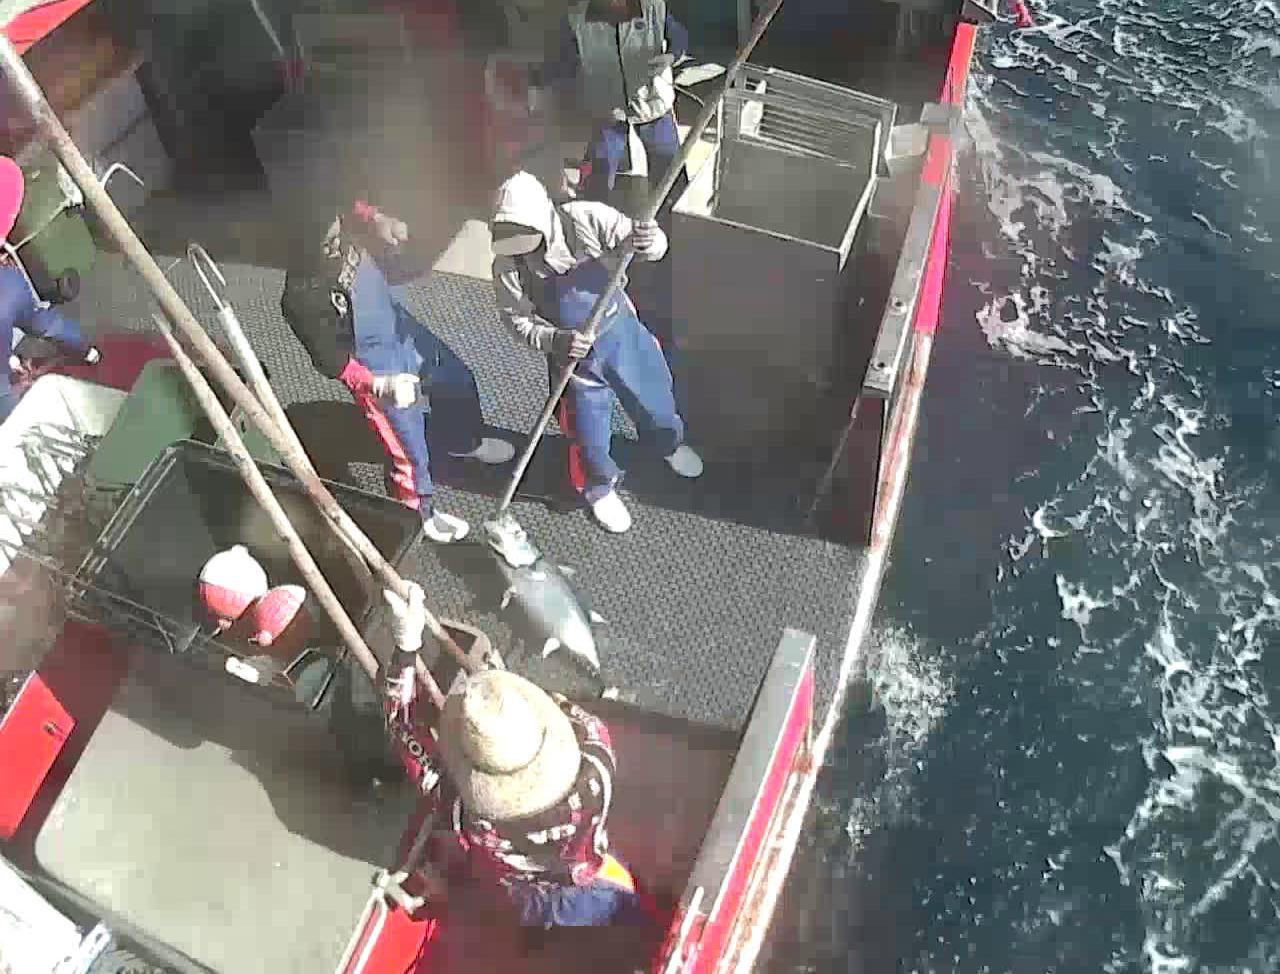

In [30]:
im = Image.open('F:/Kaggle/The Nature Conservancy/train/train/ALB/img_00012.jpg')
a = np.asarray(im)
print(a.shape)
im